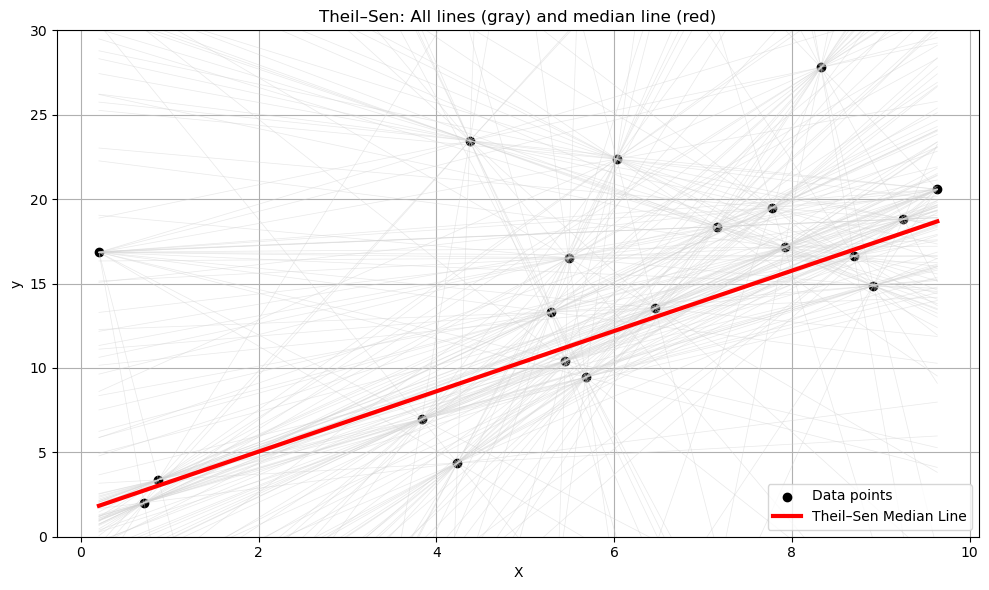

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate sample data
np.random.seed(0)
X = np.sort(np.random.rand(20) * 10)  # 20 points uniformly spaced in [0, 10]
y = 2 * X + 1 + np.random.randn(20) * 2  # Linear trend + noise

# Add a few strong outliers
y[::5] += np.random.normal(10, 2, size=4)

# 2. Compute slopes and intercepts for all unique point pairs
slopes = []
intercepts = []

n = len(X)
for i in range(n):
    for j in range(i + 1, n):
        if X[j] != X[i]:  # Avoid division by zero
            m = (y[j] - y[i]) / (X[j] - X[i])
            b = y[i] - m * X[i]
            slopes.append(m)
            intercepts.append(b)

slopes = np.array(slopes)
intercepts = np.array(intercepts)

# 3. Compute Theil–Sen median slope and intercept
median_slope = np.median(slopes)
median_intercept = np.median(intercepts)

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label="Data points")

# Set x-range based on data
x_min, x_max = X.min(), X.max()
x_vals = np.linspace(x_min, x_max, 200)

# Estimate y-range based on all candidate lines
y_lines = []
for m, b in zip(slopes, intercepts):
    y_lines.append(m * x_vals + b)

y_lines = np.array(y_lines)
plt.ylim(0, 30)

# Draw all candidate lines in light gray
for m, b in zip(slopes, intercepts):
    plt.plot(x_vals, m * x_vals + b, color='lightgray', alpha=0.5, linewidth=0.5)

# Draw Theil–Sen final line in bold red
plt.plot(x_vals, median_slope * x_vals + median_intercept, color='red', linewidth=3, label="Theil–Sen Median Line")

# Final plot formatting
plt.title("Theil–Sen: All lines (gray) and median line (red)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure to a file
plt.savefig("theil_sen_lines.png", dpi=300)
plt.show()


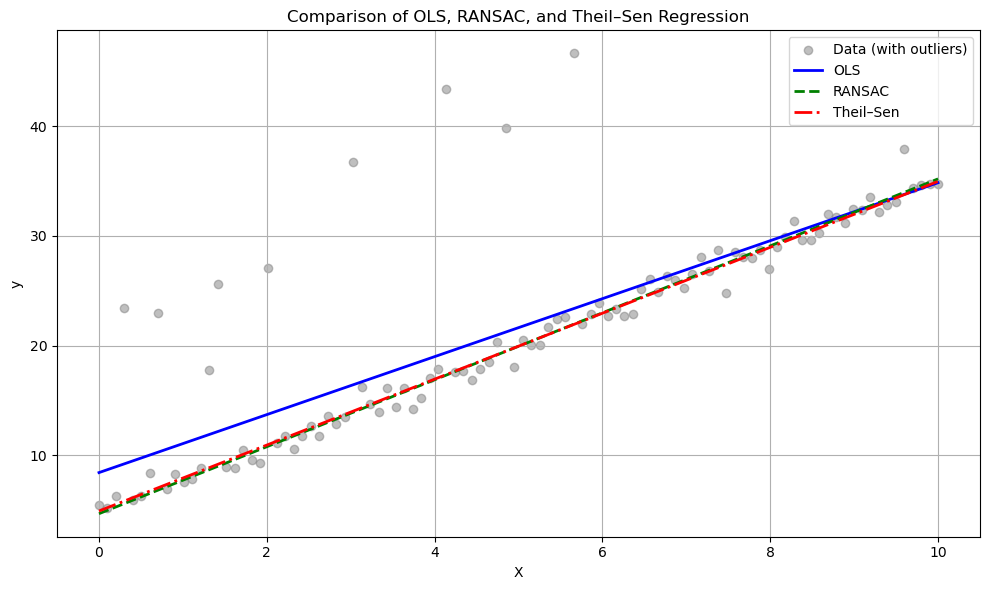

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor


np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.normal(0, 1, size=X.shape[0])

n_outliers = 10
indices = np.random.choice(np.arange(100), size=n_outliers, replace=False)
y[indices] += np.random.normal(20, 5, size=n_outliers) 


ols = LinearRegression().fit(X, y)
ransac = RANSACRegressor().fit(X, y)
theil_sen = TheilSenRegressor().fit(X, y)


X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_ols = ols.predict(X_plot)
y_ransac = ransac.predict(X_plot)
y_theil = theil_sen.predict(X_plot)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label="Data (with outliers)")
plt.plot(X_plot, y_ols, color='blue', linewidth=2, label="OLS")
plt.plot(X_plot, y_ransac, color='green', linewidth=2, linestyle='--', label="RANSAC")
plt.plot(X_plot, y_theil, color='red', linewidth=2, linestyle='-.', label="Theil–Sen")
plt.title("Comparison of OLS, RANSAC, and Theil–Sen Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
